# Load Libraries

In [ ]:
import numpy as np

from keras.models import Sequential

import pandas as p

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

from keras.models import Sequential

from keras.layers import Dense ,Activation

from keras.utils import to_categorical

from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import ExtraTreesClassifier

# Load Data

In [2]:

data = p.read_csv('/Data/covtype.csv')
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


# Data Description

In [3]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


# Feature extraction using Extra Tree Classifier

In [5]:
dataset = data.iloc[:,0:53]
trg = data['Cover_Type']
model = ExtraTreesClassifier()
model.fit(dataset, trg)
print(model.feature_importances_)

[  2.06723068e-01   5.20815153e-02   3.65723128e-02   6.38864011e-02
   5.97377464e-02   1.11609611e-01   4.21472440e-02   4.51172933e-02
   4.32571064e-02   1.04809519e-01   1.35064784e-02   5.64510086e-03
   1.46047978e-02   3.36741503e-02   1.18104967e-03   9.91650880e-03
   2.62044261e-03   1.38724530e-02   8.74224893e-04   1.30712619e-03
   5.17595558e-05   5.93829898e-05   1.93817817e-04   1.33309351e-02
   3.57747080e-03   1.47148102e-02   4.48967097e-03   6.49590717e-04
   4.06866395e-06   9.28236042e-04   2.07728446e-03   4.68222512e-04
   9.08563473e-04   2.25147888e-03   1.22210377e-03   2.01334954e-02
   1.10950773e-02   4.11187453e-03   2.90698430e-04   6.87929590e-04
   1.04529440e-03   4.10036909e-04   6.21232746e-03   4.16796415e-03
   3.89965616e-03   4.23228556e-03   4.94470973e-03   9.47030599e-04
   2.41633934e-03   1.17118346e-04   9.50341256e-04   1.32568567e-02
   1.30094182e-02]


# Displaying some histograms

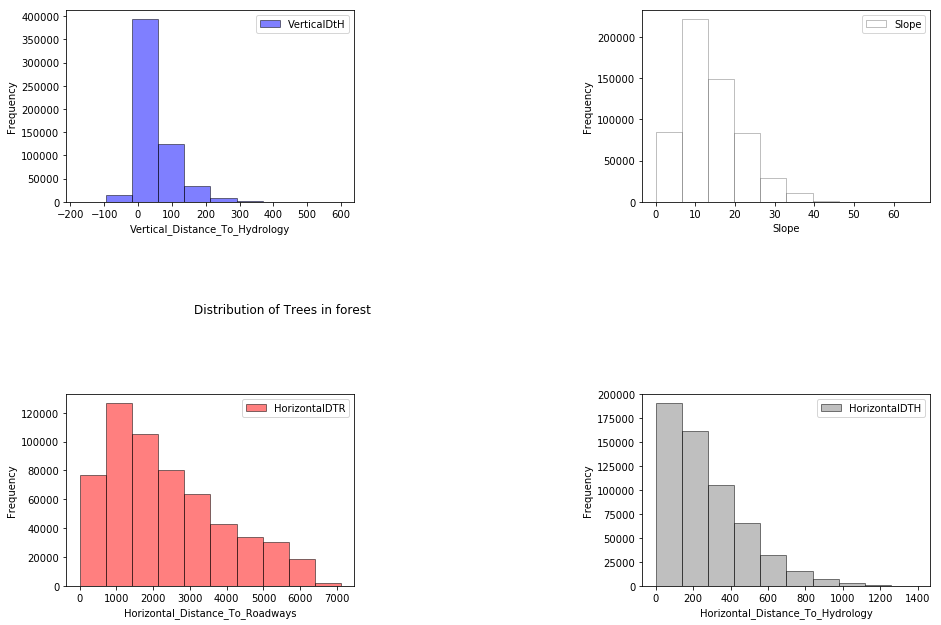

In [5]:
fig, ax = plt.subplots(2, 2)

ax[0,0].hist(data.Vertical_Distance_To_Hydrology, 10, facecolor='blue',ec = 'black', alpha=0.5, label="VerticalDtH")
ax[0,1].hist(data.Slope, 10, facecolor='white', ec="black", lw=0.5, alpha=0.5, label="Slope")
ax[1,0].hist(data.Horizontal_Distance_To_Roadways,facecolor= 'red',ec = 'black',alpha = 0.5,label ='HorizontalDTR' )
ax[1,1].hist(data.Horizontal_Distance_To_Hydrology,facecolor= 'grey',ec = 'black',alpha = 0.5,label ='HorizontalDTH' )

fig.subplots_adjust(left=0, right=2, bottom=0, top=2, hspace=1, wspace=1)

ax[0,0].set_xlabel("Vertical_Distance_To_Hydrology")
ax[0,0].set_ylabel("Frequency")
ax[0,1].set_xlabel("Slope")
ax[0,1].set_ylabel("Frequency")
ax[1,0].set_xlabel("Horizontal_Distance_To_Roadways")
ax[1,0].set_ylabel("Frequency")
ax[1,1].set_xlabel("Horizontal_Distance_To_Hydrology")
ax[1,1].set_ylabel("Frequency")
ax[0,0].legend(loc='best')
ax[0,1].legend(loc='best')
ax[1,0].legend(loc='best')
ax[1,1].legend(loc='best')
fig.suptitle("Distribution of Trees in forest")

plt.show()

In [ ]:
fig,ax = plt.subplots(1,2)

ax[0].scatter(x=data.Slope,y=data.Horizontal_Distance_To_Hydrology)
ax[1].scatter(x = data.Horizontal_Distance_To_Roadways,y = data.Slope)
fig.subplots_adjust(left=0, right=2, bottom=0, top=1, hspace=1, wspace=1)
ax[0].set_xlabel("Slope")
ax[0].set_ylabel("HDTH")
ax[1].set_xlabel("HDTR")
ax[1].set_ylabel("Slope")
ax[0].legend(loc='best')
ax[1].legend(loc='best')


plt.show()

# Split the data to train and test 

In [ ]:
from sklearn.model_selection import train_test_split
t_features = data[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology',
                'Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm',
                'Horizontal_Distance_To_Fire_Points','Wilderness_Area4','Soil_Type10',
                'Soil_Type12','Soil_Type22','Soil_Type23','Soil_Type39','Soil_Type40']]
t_target = data.Cover_Type

train_f, test_f, train_t, test_t = train_test_split(t_features, t_target, test_size=0.33, random_state=42)
encoder = LabelEncoder()
encoder.fit(train_t)
encoded_l = encoder.transform(train_t)
targets = to_categorical(encoded_l)
encoded_t = encoder.transform(test_t)
t_tr = to_categorical(encoded_t)
# Preprocessing
scaled = StandardScaler().fit(train_f)
train_f = scaled.transform(train_f)
test_f = scaled.transform(test_f)

# Create model

In [52]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(17, activation='relu', input_shape=(17,)))

# Add hidden layers 
model.add(Dense(54, activation='relu'))
model.add(Dense(54, activation='relu'))
model.add(Dense(54, activation='relu'))
model.add(Dense(54, activation='relu'))

# Add an output layer 
model.add(Dense(7, activation='softmax'))

In [53]:
# some description

# Model output shape
model.output_shape

# Model summary
model.summary()

# Model config
model.get_config()

# List all weight tensors 
model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 17)                306       
_________________________________________________________________
dense_38 (Dense)             (None, 54)                972       
_________________________________________________________________
dense_39 (Dense)             (None, 54)                2970      
_________________________________________________________________
dense_40 (Dense)             (None, 54)                2970      
_________________________________________________________________
dense_41 (Dense)             (None, 54)                2970      
_________________________________________________________________
dense_42 (Dense)             (None, 7)                 385       
Total params: 10,573
Trainable params: 10,573
Non-trainable params: 0
_________________________________________________________________


[array([[ -2.09705085e-01,  -4.70533073e-02,  -4.03959751e-01,
           4.06566888e-01,   1.35851473e-01,   6.33780062e-02,
          -1.17330968e-01,  -2.46159017e-01,   1.46013409e-01,
          -1.50223553e-01,  -3.82191271e-01,   3.48642558e-01,
          -5.75842857e-02,  -1.88025251e-01,  -2.63103276e-01,
           2.07889467e-01,   9.11289752e-02],
        [  3.72512490e-01,  -1.15619004e-01,   1.71606690e-01,
           7.56531060e-02,   3.39558333e-01,   4.35899198e-02,
          -2.91077107e-01,  -2.32625961e-01,  -2.58502215e-01,
           2.15924293e-01,  -2.39826262e-01,  -3.44186723e-01,
          -1.19754821e-01,  -2.85999417e-01,  -3.77841294e-01,
          -5.84200919e-02,  -1.62251651e-01],
        [  2.58309990e-01,  -1.49409682e-01,   6.26659989e-02,
           2.03450769e-01,   1.11290663e-01,   1.85142964e-01,
          -6.66187406e-02,   3.76105517e-01,  -1.39361143e-01,
           2.76317626e-01,  -2.97159553e-01,   1.45671874e-01,
          -3.42518985e-02,

In [56]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_f,targets,epochs=150, batch_size=150, verbose=1,validation_data=(test_f,t_tr)) 

Train on 389278 samples, validate on 191734 samples
Epoch 1/150
389278/389278 [==============================] - 10s - loss: 0.6549 - acc: 0.7175 - val_loss: 0.5879 - val_acc: 0.7425
Epoch 2/150
389278/389278 [==============================] - 9s - loss: 0.5640 - acc: 0.7541 - val_loss: 0.5421 - val_acc: 0.7625
Epoch 3/150
389278/389278 [==============================] - 10s - loss: 0.5254 - acc: 0.7725 - val_loss: 0.5154 - val_acc: 0.7792
Epoch 4/150
389278/389278 [==============================] - 10s - loss: 0.4943 - acc: 0.7874 - val_loss: 0.4863 - val_acc: 0.7896
Epoch 5/150
389278/389278 [==============================] - 9s - loss: 0.4703 - acc: 0.7987 - val_loss: 0.4820 - val_acc: 0.7920
Epoch 6/150
389278/389278 [==============================] - 9s - loss: 0.4514 - acc: 0.8078 - val_loss: 0.4476 - val_acc: 0.8111
Epoch 7/150
389278/389278 [==============================] - 10s - loss: 0.4380 - acc: 0.8137 - val_loss: 0.4353 - val_acc: 0.8163
Epoch 8/150
389278/389278 [=======